In [1]:
from google.colab import files
uploaded=files.upload() 
#uploading data

Saving vending_machine_sales.csv to vending_machine_sales.csv


In [2]:
import pandas as pd
#importing data

df=pd.read_csv('vending_machine_sales.csv')

df

,Status,ID,Location,Machine,Product,Category,Transaction,TransDate,Type,RCoil,RPrice,RQty,MCoil,MPrice,MQty,LineTotal,TransTotal,Date
0,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14515778905,"Saturday, January 1, 2022",Credit,148,3.5,1,148,3.5,1,3.5,3.5,1/1/2022
1,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14516018629,"Saturday, January 1, 2022",Credit,148,3.5,1,148,3.5,1,3.5,5.0,1/1/2022
2,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,14516018629,"Saturday, January 1, 2022",Credit,123,1.5,1,123,1.5,1,1.5,5.0,1/1/2022
3,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,14516020373,"Saturday, January 1, 2022",Credit,123,1.5,1,123,1.5,1,1.5,1.5,1/1/2022
4,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14516021756,"Saturday, January 1, 2022",Credit,148,3.5,1,148,3.5,1,3.5,3.5,1/1/2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6440,Processed,VJ300320692,EB Public Library,EB Public Library x1380,Lindens - Chocolate Chippers,Food,15603201222,"Wednesday, August 31, 2022",Credit,122,2.0,1,122,2.0,1,2.0,6.0,8/31/2022
6441,Processed,VJ300320692,EB Public Library,EB Public Library x1380,Wonderful Pistachios - Variety,Food,15603201222,"Wednesday, August 31, 2022",Credit,131,2.0,1,131,2.0,1,2.0,6.0,8/31/2022
6442,Processed,VJ300320692,EB Public Library,EB Public Library x1380,Hungry Buddha - Chocolate Chip,Food,15603201222,"Wednesday, August 31, 2022",Credit,137,2.0,1,137,2.0,1,2.0,6.0,8/31/2022
6443,Processed,VJ300320609,GuttenPlans,GuttenPlans x1367,Snapple Tea - Lemon,Non Carbonated,15603853105,"Wednesday, August 31, 2022",Credit,145,2.5,1,145,2.5,1,2.5,2.5,8/31/2022


In [3]:
df=df.dropna()
df=df.dropna(axis=0)
# Reset index after drop
df=df.dropna().reset_index(drop=True)

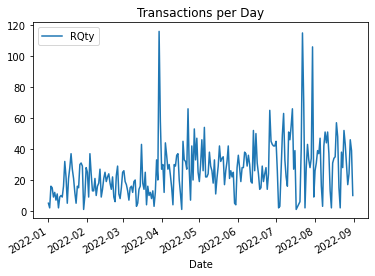

In [4]:
#creating two dataframes one for showing intial graphs and one inputing into machine learning
Pd_ML=df[['Date','RQty']].copy()
Pd_ML['Date']=pd.to_datetime(Pd_ML['Date'])
Pd_show=Pd_ML
Pd_ML=Pd_ML.groupby('Date').agg({'RQty':pd.Series.sum})
Pd_show=Pd_show.groupby('Date').agg({'RQty':pd.Series.sum})
Pd_ML.plot(title='Transactions per Day') #this graph shows total transactions per day

<function matplotlib.pyplot.show(*args, **kw)>

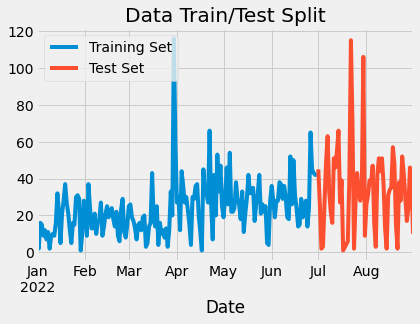

In [5]:
train = Pd_show.loc[Pd_show.index < '2022-07-01'] #Blue color
test = Pd_show.loc[Pd_show.index >= '2022-07-01'] #Orange color
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots()
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.legend(['Training Set', 'Test Set'])
plt.show
#ploting metrics and showing graph below

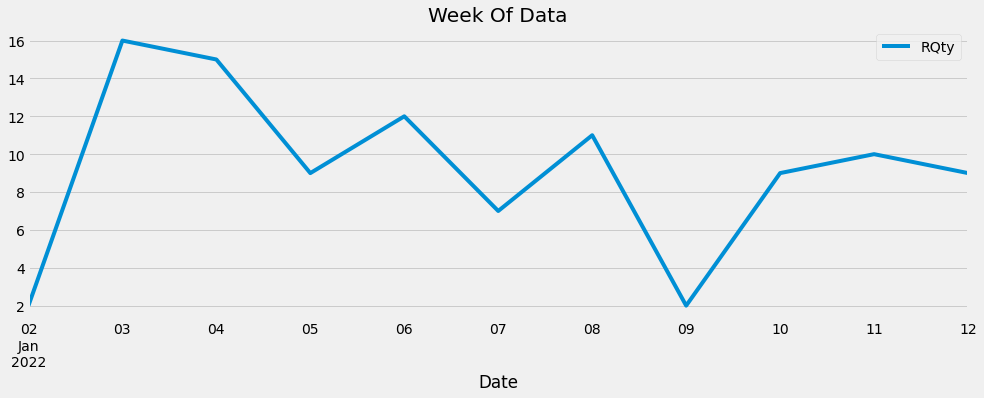

In [6]:
Pd_show.loc[(Pd_show.index > '2022-01-01') & (Pd_show.index < '2022-01-13')].plot(figsize=(15, 5), title='Week Of Data')
plt.show()
#you can see some sale on the weekend as some machines are in locations that are open during weekends heres a two weeks of date

In [7]:
# feature creation
import seaborn as sns
color_pal = sns.color_palette()
 

def create_features(Pd_show):

  
  Pd_show = Pd_show.copy()
  Pd_show['dayofweek'] = Pd_show.index.dayofweek
  Pd_show['quarter'] = Pd_show.index.quarter
  Pd_show['month'] = Pd_show.index.month
  Pd_show['dayofmonth'] = Pd_show.index.day
  return Pd_show

Pd_show = create_features(Pd_show)



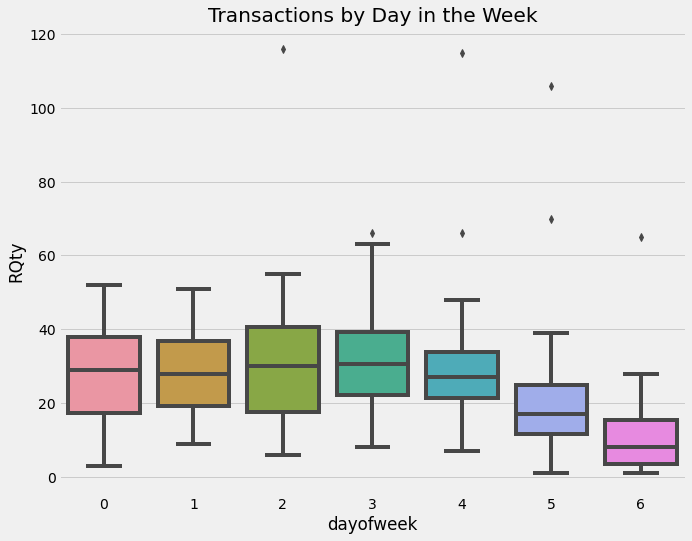

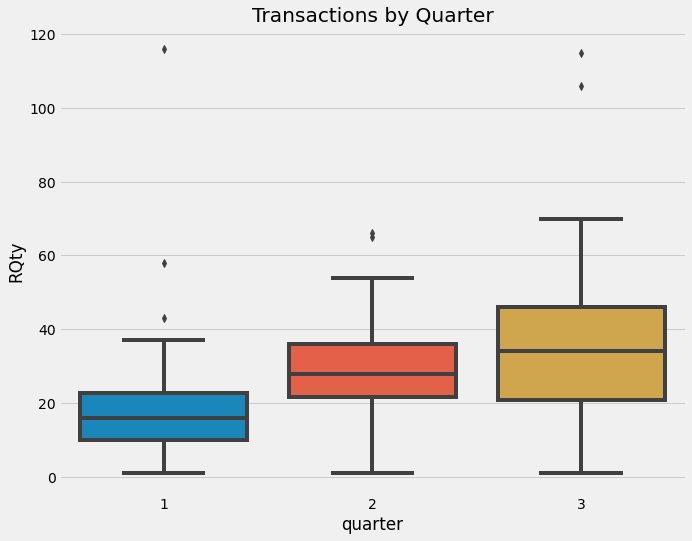

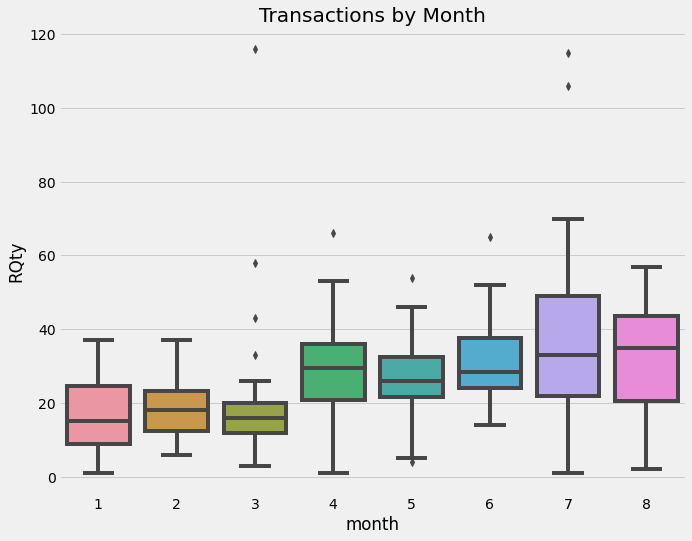

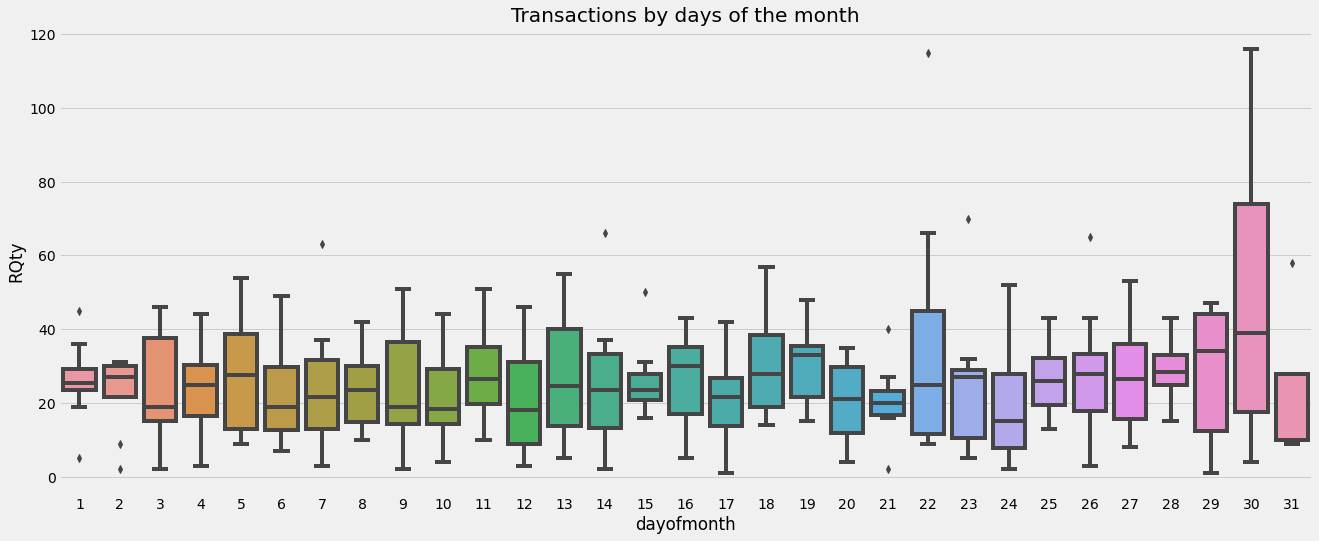

In [8]:
#visulization of features
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=Pd_show, x='dayofweek', y='RQty')
ax.set_title('Transactions by Day in the Week')
plt.show()

fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=Pd_show, x='quarter', y='RQty')
ax.set_title('Transactions by Quarter')
plt.show()

fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=Pd_show, x='month', y='RQty')
ax.set_title('Transactions by Month')
plt.show()

fig, ax = plt.subplots(figsize=(20, 8))
sns.boxplot(data=Pd_show, x='dayofmonth', y='RQty')
ax.set_title('Transactions by days of the month')
plt.show()

In [9]:
  Pd_show['dayofweek'] = Pd_show.index.dayofweek
  Pd_show['quarter'] = Pd_show.index.quarter
  Pd_show['month'] = Pd_show.index.month
  Pd_show['dayofmonth'] = Pd_show.index.day

In [10]:
from sklearn.metrics import mean_squared_error
import xgboost as xgb

train = create_features(train)
test = create_features(test)

FEATURES = ['dayofweek', 'quarter', 'month', 'dayofmonth']
TARGET = 'RQty'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [11]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=7000,
                       early_stopping_rounds=5,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.0001) 
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=10)

[20:16:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:27.2343	validation_1-rmse:40.7262
[10]	validation_0-rmse:27.2121	validation_1-rmse:40.7021
[20]	validation_0-rmse:27.1899	validation_1-rmse:40.6781
[30]	validation_0-rmse:27.1677	validation_1-rmse:40.6541
[40]	validation_0-rmse:27.1455	validation_1-rmse:40.6301
[50]	validation_0-rmse:27.1234	validation_1-rmse:40.6061
[60]	validation_0-rmse:27.1013	validation_1-rmse:40.5822
[70]	validation_0-rmse:27.0792	validation_1-rmse:40.5583
[80]	validation_0-rmse:27.0571	validation_1-rmse:40.5345
[90]	validation_0-rmse:27.0351	validation_1-rmse:40.5106
[100]	validation_0-rmse:27.0131	validation_1-rmse:40.4868
[110]	validation_0-rmse:26.9911	validation_1-rmse:40.463
[120]	validation_0-rmse:26.9691	validation_1-rmse:40.4393
[130]	validation_0-rmse:26.9472	validation_1-rmse:40.4156
[140]	validation_0-rmse:26.9253	validation_1-rmse:40.3919
[150]	validatio

XGBRegressor(early_stopping_rounds=5, learning_rate=0.0001, n_estimators=7000)

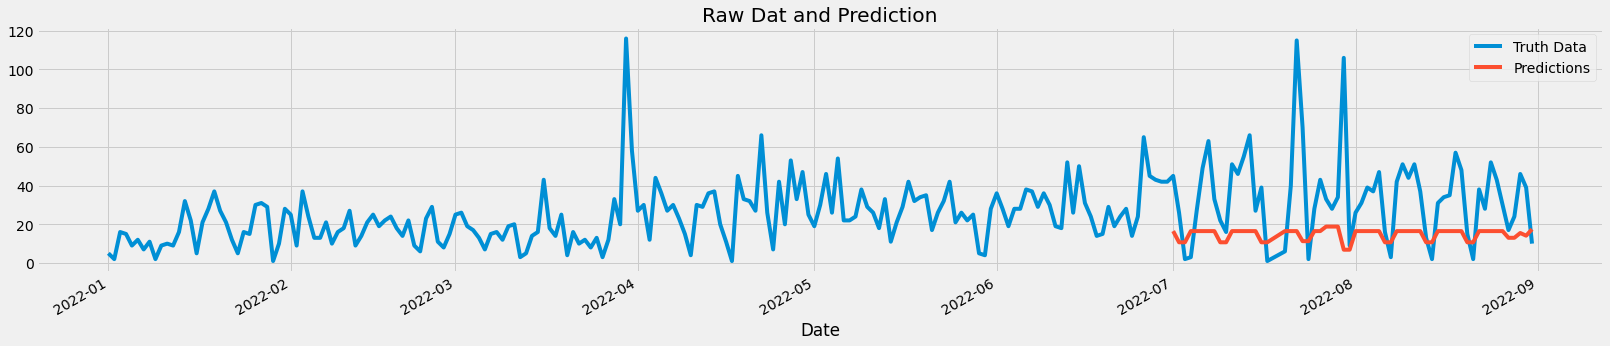

In [12]:
test['prediction'] = reg.predict(X_test)
Pd_show = Pd_show.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = Pd_show[['RQty']].plot(figsize=(25, 5))
Pd_show['prediction'].plot()
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

In [13]:
import numpy as np

score = np.sqrt(mean_squared_error(test['RQty'], test['prediction']))
print('RMSE Score on Test set: (using XGB):',score)


RMSE Score on Test set: (using XGB): 29.378253809997027


In [14]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()

from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,max_features=3, random_state=1)

Pd_ML['Sale_Yesterday']=Pd_ML['RQty'].shift(+1)
Pd_ML['Sale_2days_ago']=Pd_ML['RQty'].shift(+2)
Pd_ML['Sale_3days_ago']=Pd_ML['RQty'].shift(+3)
Pd_ML['Sale_4days_ago']=Pd_ML['RQty'].shift(+4)

Pd_ML=Pd_ML.dropna()

In [15]:
import numpy as np
x1,x2,x3,x4,y=Pd_ML['Sale_Yesterday'],Pd_ML['Sale_2days_ago'],Pd_ML['Sale_3days_ago'],Pd_ML['Sale_4days_ago'],Pd_ML['RQty']
x1,x2,x3,x4,y=np.array(x1),np.array(x2),np.array(x3),np.array(x4),np.array(y)
x1,x2,x3,x4,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),x4.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3,x4),axis=1)
print(final_x)

[[ 15.  16.   2.   5.]
 [  9.  15.  16.   2.]
 [ 12.   9.  15.  16.]
 [  7.  12.   9.  15.]
 [ 11.   7.  12.   9.]
 [  2.  11.   7.  12.]
 [  9.   2.  11.   7.]
 [ 10.   9.   2.  11.]
 [  9.  10.   9.   2.]
 [ 16.   9.  10.   9.]
 [ 32.  16.   9.  10.]
 [ 22.  32.  16.   9.]
 [  5.  22.  32.  16.]
 [ 21.   5.  22.  32.]
 [ 28.  21.   5.  22.]
 [ 37.  28.  21.   5.]
 [ 27.  37.  28.  21.]
 [ 21.  27.  37.  28.]
 [ 12.  21.  27.  37.]
 [  5.  12.  21.  27.]
 [ 16.   5.  12.  21.]
 [ 15.  16.   5.  12.]
 [ 30.  15.  16.   5.]
 [ 31.  30.  15.  16.]
 [ 29.  31.  30.  15.]
 [  1.  29.  31.  30.]
 [ 10.   1.  29.  31.]
 [ 28.  10.   1.  29.]
 [ 25.  28.  10.   1.]
 [  9.  25.  28.  10.]
 [ 37.   9.  25.  28.]
 [ 24.  37.   9.  25.]
 [ 13.  24.  37.   9.]
 [ 13.  13.  24.  37.]
 [ 21.  13.  13.  24.]
 [ 10.  21.  13.  13.]
 [ 16.  10.  21.  13.]
 [ 18.  16.  10.  21.]
 [ 27.  18.  16.  10.]
 [  9.  27.  18.  16.]
 [ 14.   9.  27.  18.]
 [ 21.  14.   9.  27.]
 [ 25.  21.  14.   9.]
 [ 19.  25.

In [16]:
X_train,X_test,y_train,y_test=final_x[:-30],final_x[-30:],y[:-30],y[-30:]

In [17]:
model.fit(X_train,y_train)
lin_model.fit(X_train,y_train)

<ipython-input-17-293373e02e7d>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


LinearRegression()

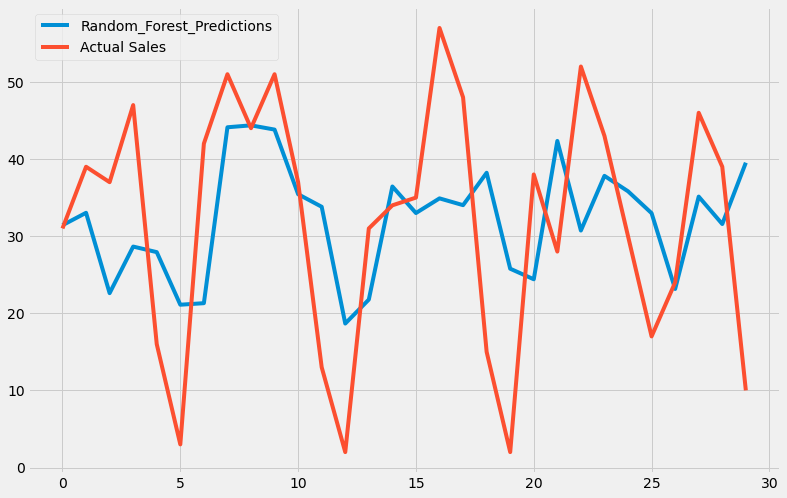

In [18]:
pred=model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred,label='Random_Forest_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

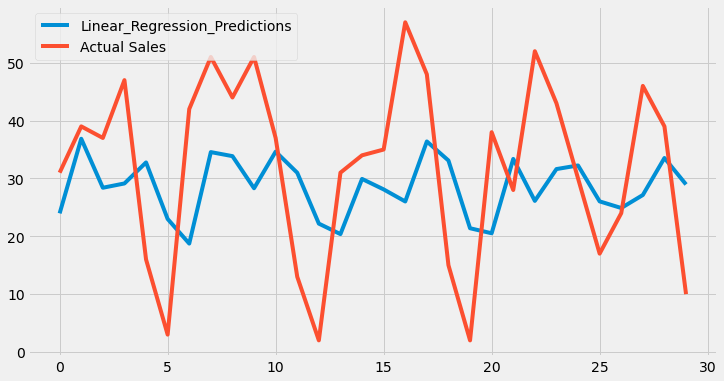

In [19]:
lin_pred=lin_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(lin_pred,label='Linear_Regression_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

In [20]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_rf=sqrt(mean_squared_error(pred,y_test))
rmse_lr=sqrt(mean_squared_error(lin_pred,y_test))

In [21]:
print('Mean Squared Error for Random Forest Model (using SKLEARN):',rmse_rf)
print('Mean Squared Error for Linear Regression Model (using SKLEARN):',rmse_lr)

Mean Squared Error for Random Forest Model (using SKLEARN): 14.58200992090368
Mean Squared Error for Linear Regression Model (using SKLEARN): 15.530122450296952
